

The datasets used in this can be found in the google drive link below -

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing



Import all the libraries you require in the cell below.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree


### 1. Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). You have been provide with a dataset as a mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy (8 marks)

A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

B. Store the feature and target variable. (2 marks)

C. Convert all categorical variables into dummy variables (1 mark)

D. Partition the data into training and test sets (70/30) (1 mark)

E. Fit the training data to a classification tree. (3 marks)

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('mushrooms.csv')
print(df)


Saving mushrooms.csv to mushrooms (5).csv
     class cap-shape cap-surface  ... spore-print-color population habitat
0        p         x           s  ...                 k          s       u
1        e         x           s  ...                 n          n       g
2        e         b           s  ...                 n          n       m
3        p         x           y  ...                 k          s       u
4        e         x           s  ...                 n          a       g
...    ...       ...         ...  ...               ...        ...     ...
8119     e         k           s  ...                 b          c       l
8120     e         x           s  ...                 b          v       l
8121     e         f           s  ...                 b          c       l
8122     p         k           y  ...                 w          v       l
8123     e         x           s  ...                 o          c       l

[8124 rows x 23 columns]


In [ ]:

#A 
#class is the dependent variable

#C
df1 = df.drop(['class'], axis=1)
a = df1.columns.values.tolist()
df = pd.get_dummies(df, columns = a)
print(df)

#B
X = df.iloc[:, 1:]
y = df.iloc[:, 0]



#D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

#E
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)


     class  cap-shape_b  cap-shape_c  ...  habitat_p  habitat_u  habitat_w
0        p            0            0  ...          0          1          0
1        e            0            0  ...          0          0          0
2        e            1            0  ...          0          0          0
3        p            0            0  ...          0          1          0
4        e            0            0  ...          0          0          0
...    ...          ...          ...  ...        ...        ...        ...
8119     e            0            0  ...          0          0          0
8120     e            0            0  ...          0          0          0
8121     e            0            0  ...          0          0          0
8122     p            0            0  ...          0          0          0
8123     e            0            0  ...          0          0          0

[8124 rows x 118 columns]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics (3 marks)



[[1263    0]
 [   3 1172]]


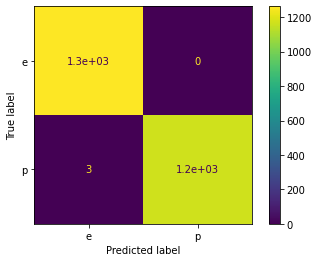

In [ ]:

y_pred = dt.predict(X_test)

# Plot and print confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()


3. Print the accuracy on the training partition?  (2 marks)


In [ ]:
training_pred = dt.predict(X_train)
print('Accuracy =', metrics.accuracy_score(y_train, training_pred))

Accuracy = 1.0


4. Print the accuracy on the test partition? (2 marks)


In [ ]:
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.9987694831829368


5. Show the classification tree and save it (5 marks)


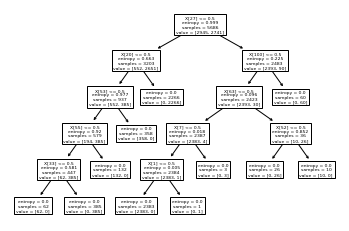

In [ ]:
plt.figure(2)
edibleTree = tree.plot_tree(dt)
plt.show()


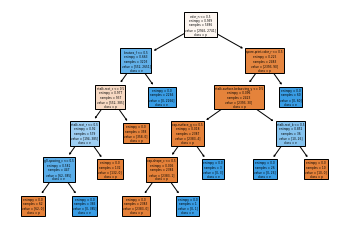

In [ ]:
plt.figure(2)
fn = X.columns
cn = y.unique()
edibleTree = tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.savefig('edibleDT.png')
plt.show()

6. Find and print the top three most important features in your decision tree for determining toxicity. (4 marks)

In [ ]:
print('Feature Importance:', dt.feature_importances_)
imp=pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
imp.sort_values(by = 1, ascending=False).head(3)

Feature Importance: [0.         0.00222887 0.         0.         0.         0.
 0.         0.00527896 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.21269464 0.         0.         0.
 0.         0.         0.         0.5278987  0.         0.
 0.         0.         0.         0.04570394 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00540188 0.06737296
 0.         0.04806723 0.         0.         0.         0.
 0.         0.         0.         0.02812073 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.   

,0,1
27,odor_n,0.527899
20,bruises_f,0.212695
53,stalk-root_c,0.067373


7. Classify the following mushroom. (6 marks)

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [ ]:
#create df with requested features
values_dic = {'cap-shape': ['x'], 'cap-surface': ['s'], 'cap-color' : ['n'],
'bruises' : ['t'], 'odor' : ['y'], 'gill-attachment' : ['f'],
'gill-spacing' : ['c'], 'gill-size' : ['n'], 'gill-color' : ['k'],
'stalk-shape' : ['e'], 'stalk-root' : ['e'],
'stalk-surface-above-ring' : ['s'], 'stalk-surface-below-ring' : ['s'],
'stalk-color-above-ring' : ['w'], 'stalk-color-below-ring' : ['w'],
'veil-type' : ['p'], 'veil-color' : ['w'], 'ring-number' : ['o'],
'ring-type' : ['p'], 'spore-print-color' : ['r'], 'population' : ['s'],
'habitat' : ['u']}

frame1 = pd.DataFrame(values_dic)
#concat df 
all = pd.concat([frame1, df], ignore_index=True)

#predict
df4 = pd.get_dummies(all)
del df4['class_e']
del df4['class_p']
lastrow = df4.iloc[-1:]
a = dt.predict(lastrow)
print(a)

ValueError: ignored